In [1]:
# do the required imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(r'Modules')
import wellplate_tools_pandas_py3_5 as wpt
%matplotlib inline

In [4]:
filename_single = r'Data\fixed endpoint 3C 2_5 384well_Single.csv'

# define wellplate type
platetype = 384
# get numer of rows and columns
Nr, Nc = wpt.getrowandcolumn(platetype)

# read the CSV table containing all the single object data for
# further "in-depth" analysis
df_single = pd.read_csv(filename_single, sep=';')

# get headers and number of measurment parameters
# default number of non-measurement parameters = 5 (the first five columns from ZEN CSV Export)
num_nonmp = 5
headers = df_single.head(0)
num_param = len(df_single.columns) - num_nonmp
print('Number of Object Parameters: ', num_param)
df_single.rename(columns={df_single.columns[0]: 'WellID',
                        df_single.columns[1]: 'RowID',
                        df_single.columns[2]: 'ColumnID',
                        df_single.columns[3]: 'ID',
                        df_single.columns[4]: 'Index'}, inplace=True)

In [5]:
# remove rows with units
df_single = wpt.remove_units(df_single)
# convert decimal separators
df_single = wpt.convert_dec_sep(df_single)

# show part of dataframe
df_single[:3]

,WellID,RowID,ColumnID,ID,Index,IntensityMean_DAPI::Intensity Mean Value of channel 'DAPI'!!R,Area::Area!!R,Perimeter::Perimeter!!R,Roundness::Roundness!!R
1,A1,1.0,1.0,2.0,1.0,1188.655172,96.774859,37.865007,0.568069
2,A1,1.0,1.0,3.0,2.0,1295.805556,240.268616,77.426953,0.313977
3,A1,1.0,1.0,4.0,3.0,1466.859375,427.144207,104.958227,0.384401


In [6]:
# use statistics --> we just calculate the mean values
# for a wells to be displayed inside the heatmaps.
# currently implemented are mean, median, min, max.
stf = 'mean'

# create a dictionary containing a dataframe for every measure parameters
# as a heatmap and a dictionary containing the mean values for all wells
# containing actual data points.
heatmap_dict, well_dict = wpt.fill_heatmaps(df_single, num_param, Nr, Nc, statfunc=stf, showbar=True, verbose=False)

# show all keys
print(heatmap_dict.keys())

---------------------------------------------------
wellID_key :  WellID
Found keys:
Index(['WellID', 'RowID', 'ColumnID', 'ID', 'Index',
       'IntensityMean_DAPI::Intensity Mean Value of channel 'DAPI'!!R',
       'Area::Area!!R', 'Perimeter::Perimeter!!R', 'Roundness::Roundness!!R'],
      dtype='object')
---------------------------------------------------


A Jupyter Widget

dict_keys(["IntensityMean_DAPI::Intensity Mean Value of channel 'DAPI'!!R", 'Area::Area!!R', 'Perimeter::Perimeter!!R', 'Roundness::Roundness!!R', 'ObjectNumbers'])


In [6]:
# show all keys
print heatmap_dict.keys()

['Perimeter', 'DAPI_Mean', 'Roundness', 'ObjectNumber', 'Area']


Heatmap image saved as:  Data\fixed endpoint 3C 2_5 384well_Single_HM_all.png


'Data\\fixed endpoint 3C 2_5 384well_Single_HM_all.png'

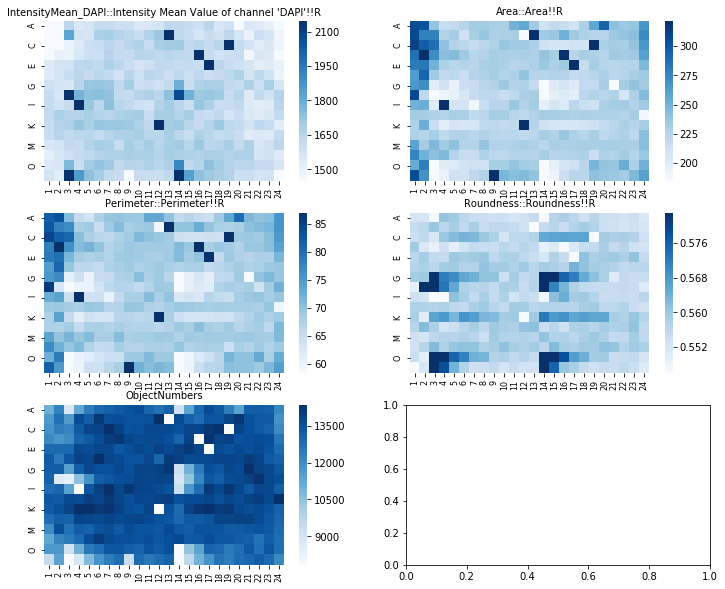

In [7]:
# define parameters to display the heatmap
fs_title = 10
fs_label = 8
#colormap ='YlGnBu'
#colormap ='RdBu_r'
colormap = 'Blues'

# show all heatmaps
wpt.showheatmap_all(heatmap_dict, [3, 2], fontsize_title=fs_title, fontsize_label=fs_label,
                    colormap='Blues', save=True, filename=filename_single)

In [10]:
# show all key = measure parameters for that dictionary
print(heatmap_dict.keys())

# example for entry for well ...
well_dict['C3']

dict_keys(["IntensityMean_DAPI::Intensity Mean Value of channel 'DAPI'!!R", 'Area::Area!!R', 'Perimeter::Perimeter!!R', 'Roundness::Roundness!!R', 'ObjectNumbers'])


WellID                                                                 C3
RowID                                                                   3
ColumnID                                                                3
IntensityMean_DAPI::Intensity Mean Value of channel 'DAPI'!!R     1496.86
Area::Area!!R                                                      288.46
Perimeter::Perimeter!!R                                           80.9166
Roundness::Roundness!!R                                          0.551824
ObjectNumbers                                                       12289
Name: 327, dtype: object

In [12]:
# show example entry of the dictionary for a parameter
heatmap_dict['ObjectNumbers']

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
A,11062.0,12299.0,8806.0,11333.0,12437.0,12962.0,13133.0,13327.0,13522.0,13657.0,...,11375.0,12939.0,13684.0,13332.0,12405.0,11460.0,13214.0,13264.0,13161.0,12204.0
B,11684.0,12732.0,11665.0,13668.0,13230.0,14171.0,13593.0,13636.0,13495.0,13518.0,...,13112.0,12810.0,13418.0,13429.0,13841.0,14203.0,13542.0,13319.0,13333.0,11884.0
C,11866.0,12401.0,12289.0,13304.0,13838.0,13881.0,14335.0,13942.0,13505.0,13559.0,...,13835.0,13811.0,14167.0,14286.0,28.0,13892.0,13531.0,13296.0,13152.0,12078.0
D,12143.0,11793.0,12067.0,13067.0,13311.0,13655.0,14044.0,14177.0,13812.0,13662.0,...,13889.0,32.0,14267.0,13853.0,13939.0,13501.0,13598.0,13669.0,13572.0,12571.0
E,12882.0,12922.0,12916.0,13731.0,13632.0,13800.0,13774.0,13359.0,13571.0,13825.0,...,14124.0,13832.0,58.0,13683.0,13497.0,13713.0,13554.0,13732.0,13516.0,12856.0
F,13267.0,12545.0,13379.0,13928.0,13846.0,14441.0,13818.0,13711.0,13510.0,13445.0,...,13674.0,13756.0,13719.0,13892.0,13858.0,13782.0,14038.0,13860.0,13324.0,13108.0
G,13212.0,13213.0,11489.0,13219.0,13754.0,13609.0,13594.0,13791.0,13545.0,13876.0,...,11022.0,12481.0,13569.0,13390.0,13810.0,13659.0,16291.0,13922.0,13794.0,13379.0
H,13118.0,8633.0,8418.0,10570.0,11880.0,13196.0,13405.0,13598.0,13660.0,13881.0,...,10495.0,12179.0,13393.0,13180.0,13647.0,13720.0,13932.0,14277.0,13795.0,13580.0
I,12820.0,13002.0,11388.0,2.0,13373.0,13971.0,15616.0,13848.0,14194.0,13893.0,...,11726.0,12823.0,14134.0,13778.0,14196.0,13807.0,13301.0,13836.0,13788.0,13229.0
J,13375.0,13299.0,13708.0,13658.0,14004.0,13811.0,14171.0,13850.0,13597.0,13828.0,...,13659.0,13686.0,13866.0,13616.0,13820.0,13659.0,13916.0,14015.0,13767.0,14968.0
